# House Price Prediction Exercise

This notebook demonstrates how to predict house prices using the house price dataset. We'll go through the process of loading data, preprocessing, model creation, and visualization of results.

## Importing Required Libraries

First, let's import all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Loading the Data

We'll define a function to load our dataset from a CSV file.

In [4]:
# Load the data
df = pd.read_csv("data/data.csv")

## Preprocessing

In [5]:
# Remove rows with missing target
df = df.dropna(subset=['SalePrice'])

# Separate features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1460, 80)
Target shape: (1460,)


## Model Creation and Training


In [7]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
    


Mean Squared Error: 870348388.494296
R2 Score: 0.8865304597242845


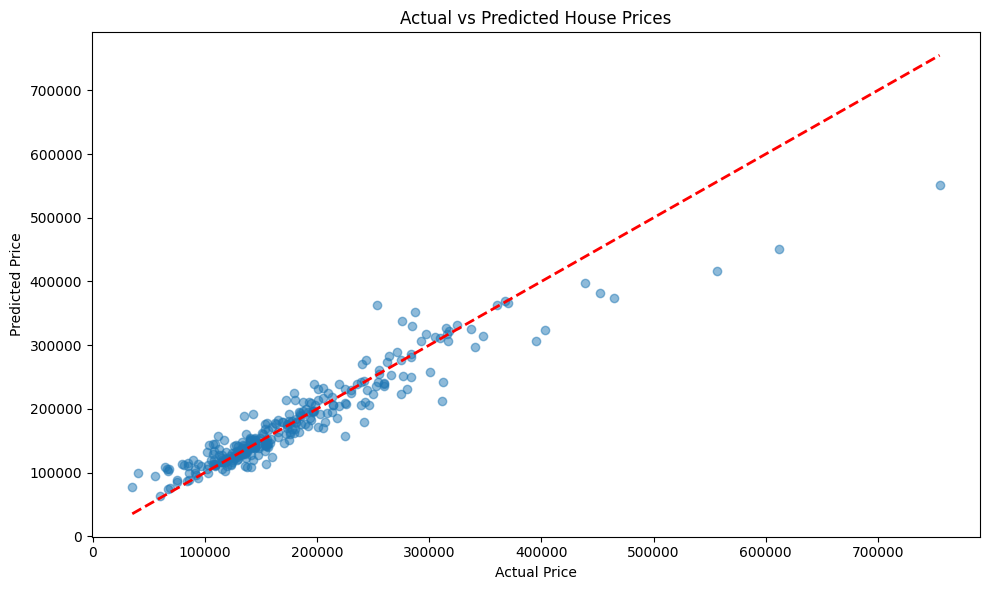

In [9]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.tight_layout()
plt.show()



## Feature Importance

Finally, let's look at the top 10 most important features in our model.

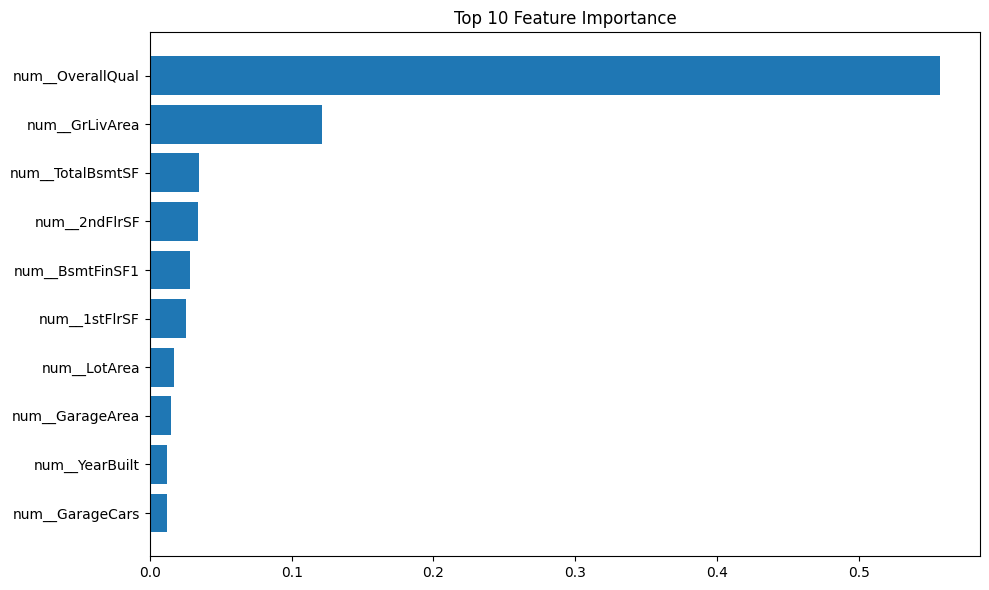

In [10]:
# Feature importance
feature_importance = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Plot feature importance
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx[-10:].shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx[-10:]])
plt.yticks(pos, feature_names[sorted_idx[-10:]])
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()